In [66]:
import pandas as pd
from datetime import datetime
from pandas.api.types import CategoricalDtype

In [25]:
pizza_jared = pd.read_csv("data/pizza_jared.csv")
pizza_barstool = pd.read_csv("data/pizza_barstool.csv")
pizza_datafiniti = pd.read_csv("data/pizza_datafiniti.csv")

In [26]:
pizza_jared.head()

,polla_qid,answer,votes,pollq_id,question,place,time,total_votes,percent
0,2,Excellent,0,2,How was Pizza Mercato?,Pizza Mercato,1344361527,13,0.0000
1,2,Good,6,2,How was Pizza Mercato?,Pizza Mercato,1344361527,13,0.4615
2,2,Average,4,2,How was Pizza Mercato?,Pizza Mercato,1344361527,13,0.3077
3,2,Poor,1,2,How was Pizza Mercato?,Pizza Mercato,1344361527,13,0.0769
4,2,Never Again,2,2,How was Pizza Mercato?,Pizza Mercato,1344361527,13,0.1538


### Answer order

In [27]:
answer_orders = ["Never Again", "Poor", "Average", "Good", "Excellent"]

### Find Number of palces Pizza

In [28]:
def find_value_counts(df, column):
    stats = df[column].value_counts()
    return len(stats), stats

In [29]:
no_pizza_places, pizza_places = find_value_counts(pizza_jared, 'place')
pizza_places

Fiore's                        25
Prince Street Pizza            20
NY Pizza Suprema               15
Rocco's Pizza Joint            10
Tappo                          10
Rocky's                        10
Pizza Mercato                  10
Pizza Paradise                 10
Saluggi's                      10
Joe's 14th                     10
Joe's Pizza 14th               10
Little Italy Pizza             10
Pomodoro                       10
Champion Pizza                  5
Pizza Bash                      5
Pizza 33                        5
Bleecker Street Pizza           5
Dona Bella                      5
Waldy's                         5
Otto Enoteca                    5
Vinny Vincenz                   5
Ben's of SoHo Spring Street     5
Naples 45                       5
Joe's Pizza                     5
Luna Pizza                      5
J's                             5
Girello                         5
Artichoke Basille's Pizza       5
Arturo's                        5
Steve's Pizza 

### How many of the Pizza places available

In [30]:
no_pizza_places

56

### Lets see how answer is used - 

In [31]:
find_value_counts(pizza_jared, 'answer')

(6, Good           75
 Poor           75
 Average        75
 Excellent      75
 Never Again    74
 Fair            1
 Name: answer, dtype: int64)

##### There are toatal 6 choices for rating. Only 1 data point has fair rating

### Derive date from time

In [32]:
pizza_jared['date'] = pizza_jared.time.apply(lambda x : datetime.fromtimestamp(x).strftime("%Y-%m-%d"))

### Let's see how question and aswer for a place are related

In [40]:
pizza_jared.groupby(['question', 'answer', 'place'])['votes'].sum()

question                     answer       place             
How Was Roio's?              Average      Roio's                 5
                             Excellent    Roio's                 1
                             Good         Roio's                 0
                             Never Again  Roio's                 0
                             Poor         Roio's                 1
                                                                ..
How was Williamsburg Pizza?  Average      Williamsburg Pizza     6
                             Excellent    Williamsburg Pizza    13
                             Good         Williamsburg Pizza    19
                             Never Again  Williamsburg Pizza     0
                             Poor         Williamsburg Pizza     1
Name: votes, Length: 281, dtype: int64

#### But above answer is not with respect to Place

### Let's try with grouping by place first

In [101]:
by_place_answer = pizza_jared.groupby(['place',  'answer'],as_index=False)['votes'].sum()


In [102]:
by_place_answer.answer.\
                                astype(CategoricalDtype(categories=answer_orders, ordered=True)).\
                                cat.rename_categories([1, 2, 3, 4, 5]).astype(int)

0      3
1      5
2      4
3      1
4      2
      ..
276    3
277    5
278    4
279    1
280    2
Name: answer, Length: 281, dtype: int32

In [106]:
by_place_answer['total'] = by_place_answer.groupby('place')['votes'].transform(sum)
by_place_answer['answer_integer'] = by_place_answer.answer.\
                                astype(CategoricalDtype(categories=answer_orders, ordered=True)).\
                                cat.rename_categories([1, 2, 3, 4, 5]).astype(int)
by_place_answer['percent'] = by_place_answer['votes'] / by_place_answer['total']
#by_place_answer['answer_integer'] = by_place_answer.answer.cat.codes
by_place_answer['average'] = by_place_answer['answer_integer'] * by_place_answer['percent']
by_place_answer['average'] = by_place_answer.groupby('place').average.transform('sum').astype(float)


In [107]:
by_place_answer

,place,answer,votes,total,answer_integer,percent,average
0,5 Boroughs Pizza,Average,2,3,3,0.666667,3.666667
1,5 Boroughs Pizza,Excellent,1,3,5,0.333333,3.666667
2,5 Boroughs Pizza,Good,0,3,4,0.000000,3.666667
3,5 Boroughs Pizza,Never Again,0,3,1,0.000000,3.666667
4,5 Boroughs Pizza,Poor,0,3,2,0.000000,3.666667
...,...,...,...,...,...,...,...
276,Williamsburg Pizza,Average,6,39,3,0.153846,4.128205
277,Williamsburg Pizza,Excellent,13,39,5,0.333333,4.128205
278,Williamsburg Pizza,Good,19,39,4,0.487179,4.128205
279,Williamsburg Pizza,Never Again,0,39,1,0.000000,4.128205


In [108]:
by_place = by_place_answer[['place', 'total', 'average']].groupby(['place', 'total', 'average']).first()
by_place.reset_index(inplace=True)
by_place

,place,total,average
0,5 Boroughs Pizza,3,3.666667e+00
1,Artichoke Basille's Pizza,10,4.100000e+00
2,Arturo's,7,3.857143e+00
3,Bella Napoli,30,3.566667e+00
4,Ben's of SoHo 14th Street,5,3.000000e+00
5,Ben's of SoHo Spring Street,9,3.333333e+00
6,Big Slice Pizza,15,3.333333e+00
7,Bleecker Street Pizza,7,4.142857e+00
8,Bravo Pizza,0,0.000000e+00
9,Cavallo's Pizza,11,3.727273e+00


In [112]:
by_place_answer[by_place_answer.total > 29]

,place,answer,votes,total,answer_integer,percent,average
15,Bella Napoli,Average,16,30,3,0.533333,3.566667
16,Bella Napoli,Excellent,5,30,5,0.166667,3.566667
17,Bella Napoli,Good,8,30,4,0.266667,3.566667
18,Bella Napoli,Never Again,0,30,1,0.000000,3.566667
19,Bella Napoli,Poor,1,30,2,0.033333,3.566667
...,...,...,...,...,...,...,...
276,Williamsburg Pizza,Average,6,39,3,0.153846,4.128205
277,Williamsburg Pizza,Excellent,13,39,5,0.333333,4.128205
278,Williamsburg Pizza,Good,19,39,4,0.487179,4.128205
279,Williamsburg Pizza,Never Again,0,39,1,0.000000,4.128205


In [116]:
import numpy as np
import seaborn as sns
bins = np.arange(0, 40, 2)
bins

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38])

In [ ]:
g = sns.FacetGrid(tips, col="time",  row="smoker")
g = g.map(plt.hist, "total_bill", bins=bins, color="r")

NameError: name 'plt' is not defined

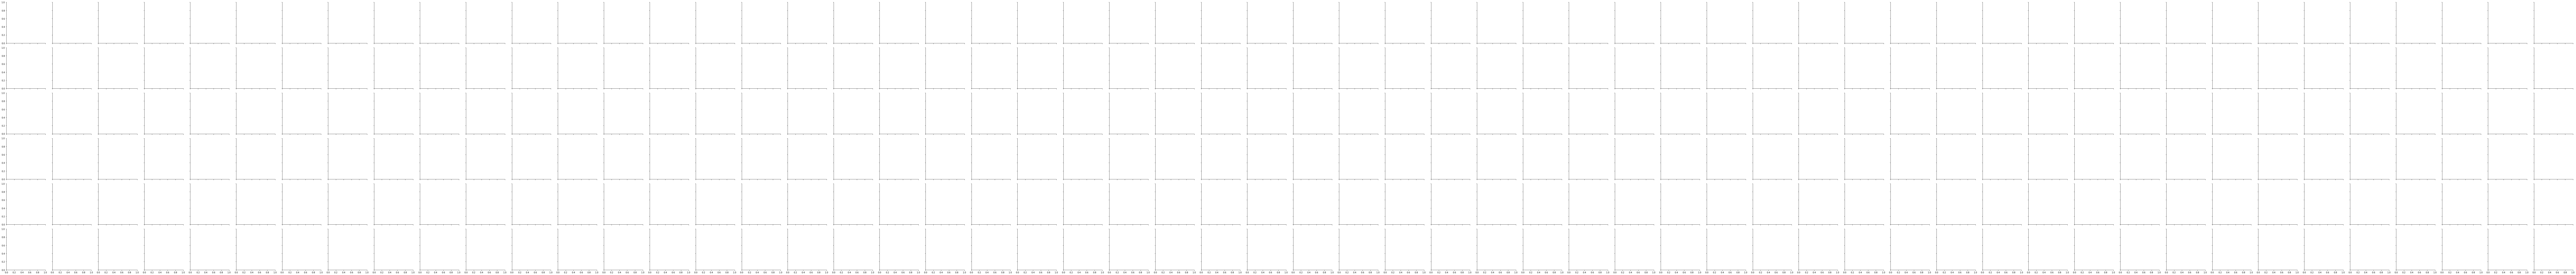

In [117]:
g = sns.FacetGrid(by_place_answer, col="place",  row="answer")
g = g.map(plt.hist, "votes", bins=bins, color="r")